In [499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [500]:
data1 = pd.read_csv('X.csv', delimiter=',')
data1.head()


,Unnamed: 0,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,0,18702,2014,1,0,V,N,1,O,1,...,IDENTIQUE,V,base,2,1351.0,4,2012.0,0.0,2,65440
1,1,3877,2014,1,0,V,V,V,V,V,...,V,N,base,2,1972.0,2,1980.0,0.0,.,14341
2,2,4942,2013,1,1,V,V,V,V,V,...,V,N,base,2,1630.0,4,NaN,0.0,.,75109
3,3,13428,2013,"0,246575342",0,N,V,V,V,V,...,V,N,base,2,532.0,3,NaN,0.0,.,92004
4,4,17137,2015,1,0,V,N,2,O,1,...,IDENTIQUE,V,base,2,1050.0,2,1972.0,0.0,4,59340


In [501]:
data2 = pd.read_csv('Y.csv', delimiter=',')
data2.head()


,Unnamed: 0,Identifiant,target
0,0,18702,0
1,1,3877,1
2,2,4942,0
3,3,13428,0
4,4,17137,0


Analyses :
- La première colonne des deux fichiers ainsi que les colonnes ft_4_categ à ft_24_categ du ficher X.csv semble inutile puisque qu'elle ne sont soit pas mentionné dans le contexte, soit présenté comme des valeurs anonymisé.
- Nous avons deux dataset qui présentent tout les deux une colonne 'Identifiants'. Il semblerais judicieux de fusionner ces deux dataset
- La colonne ft_2_categ correspond à l'année d'observation, je vais donc la renommé pour une meilleure compréhension
- J'ai vérifier la correspondance entre le type des lignes et leurs descriptions/valeurs, et cela semble plutôt cohérent sauf pour la colonne "ft_22_categ", qui semble avoir pour valeur des années, et que je vais transfomrer en int64 et "ft_4_categ" qui n'a pour valeur que des 0 ou des 1 et que je vais transformer en type boolean, et "Identifiant" qui n'est pas une variable quantitative et qui ne doit donc pas être en int64 mais en object
- Dans la colonne "ft_24_categ" je vais remplacer les valeurs "." par Null et supprimer les valeurs ">=10" qui représente moins d'1% du dataset, enfin je vais changer le type de cette colonne en int
- Nous avons décidé d'enlever les valeurs V dans ft_23_categ afin de mettre la colonne en variable quantitative.

In [502]:
dfx = data1.copy()
dfy = data2.copy()

In [503]:
dfx.drop(dfx.columns[0], axis=1, inplace=True)
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Identifiant  10229 non-null  int64  
 1   ft_2_categ   10229 non-null  int64  
 2   EXPO         10229 non-null  object 
 3   ft_4_categ   10229 non-null  int64  
 4   ft_5_categ   10229 non-null  object 
 5   ft_6_categ   10229 non-null  object 
 6   ft_7_categ   10229 non-null  object 
 7   ft_8_categ   10229 non-null  object 
 8   ft_9_categ   10229 non-null  object 
 9   ft_10_categ  10229 non-null  object 
 10  ft_11_categ  10229 non-null  object 
 11  ft_12_categ  10229 non-null  object 
 12  ft_13_categ  10229 non-null  object 
 13  ft_14_categ  10229 non-null  object 
 14  ft_15_categ  10229 non-null  object 
 15  ft_16_categ  10229 non-null  object 
 16  ft_17_categ  10229 non-null  object 
 17  ft_18_categ  10229 non-null  object 
 18  ft_19_categ  10229 non-null  int64  
 19  supe

In [504]:
dfy.drop(dfy.columns[0], axis=1, inplace=True)
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Identifiant  10229 non-null  int64
 1   target       10229 non-null  int64
dtypes: int64(2)
memory usage: 160.0 KB


In [505]:
dfx.rename(columns={'ft_2_categ': 'annee_observee'}, inplace=True)
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Identifiant     10229 non-null  int64  
 1   annee_observee  10229 non-null  int64  
 2   EXPO            10229 non-null  object 
 3   ft_4_categ      10229 non-null  int64  
 4   ft_5_categ      10229 non-null  object 
 5   ft_6_categ      10229 non-null  object 
 6   ft_7_categ      10229 non-null  object 
 7   ft_8_categ      10229 non-null  object 
 8   ft_9_categ      10229 non-null  object 
 9   ft_10_categ     10229 non-null  object 
 10  ft_11_categ     10229 non-null  object 
 11  ft_12_categ     10229 non-null  object 
 12  ft_13_categ     10229 non-null  object 
 13  ft_14_categ     10229 non-null  object 
 14  ft_15_categ     10229 non-null  object 
 15  ft_16_categ     10229 non-null  object 
 16  ft_17_categ     10229 non-null  object 
 17  ft_18_categ     10229 non-null 

In [506]:
dfz = pd.merge(dfx, dfy, on='Identifiant')
dfz.info()
dfz.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Identifiant     10229 non-null  int64  
 1   annee_observee  10229 non-null  int64  
 2   EXPO            10229 non-null  object 
 3   ft_4_categ      10229 non-null  int64  
 4   ft_5_categ      10229 non-null  object 
 5   ft_6_categ      10229 non-null  object 
 6   ft_7_categ      10229 non-null  object 
 7   ft_8_categ      10229 non-null  object 
 8   ft_9_categ      10229 non-null  object 
 9   ft_10_categ     10229 non-null  object 
 10  ft_11_categ     10229 non-null  object 
 11  ft_12_categ     10229 non-null  object 
 12  ft_13_categ     10229 non-null  object 
 13  ft_14_categ     10229 non-null  object 
 14  ft_15_categ     10229 non-null  object 
 15  ft_16_categ     10229 non-null  object 
 16  ft_17_categ     10229 non-null  object 
 17  ft_18_categ     10229 non-null 

,Identifiant,annee_observee,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,target
0,18702,2014,1,0,V,N,1,O,1,O,...,V,base,2,1351.0,4,2012.0,0.0,2,65440,0
1,3877,2014,1,0,V,V,V,V,V,V,...,N,base,2,1972.0,2,1980.0,0.0,.,14341,1
2,4942,2013,1,1,V,V,V,V,V,V,...,N,base,2,1630.0,4,NaN,0.0,.,75109,0
3,13428,2013,"0,246575342",0,N,V,V,V,V,V,...,N,base,2,532.0,3,NaN,0.0,.,92004,0
4,17137,2015,1,0,V,N,2,O,1,O,...,V,base,2,1050.0,2,1972.0,0.0,4,59340,0


In [507]:
dfz.isnull().sum()

Identifiant          0
annee_observee       0
EXPO                 0
ft_4_categ           0
ft_5_categ           0
ft_6_categ           0
ft_7_categ           0
ft_8_categ           0
ft_9_categ           0
ft_10_categ          0
ft_11_categ          0
ft_12_categ          0
ft_13_categ          0
ft_14_categ          0
ft_15_categ          0
ft_16_categ          0
ft_17_categ          0
ft_18_categ          0
ft_19_categ          0
superficief        119
ft_21_categ          0
ft_22_categ       1236
ft_23_categ          0
ft_24_categ          0
Insee              115
target               0
dtype: int64

Analyse :
- Les colonnes superficief, ft_22_categ et Insee possèdent des valeur NAN que je vais changer en 0, deplus pour ft_22_categ, je vais enlever toutes les valeurs inférieure à 1890

In [508]:
dfz['ft_22_categ'].fillna(0, inplace=True)
dfz['superficief'].fillna(0, inplace=True)
dfz['Insee'].fillna(0, inplace=True)
dfz['ft_22_categ'].head()
dfz['ft_24_categ'] = dfz['ft_24_categ'].str.strip().replace(to_replace='.', value=np.nan)
dfz['ft_24_categ'] = dfz['ft_24_categ'].str.strip().replace(to_replace='>=10', value=np.nan)
dfz['ft_24_categ'].fillna(0, inplace=True)
dfz['ft_23_categ'] = dfz['ft_23_categ'].str.strip().replace(to_replace='V', value=np.nan)
dfz.isnull().sum()

C:\Users\Mathias\AppData\Local\Temp\ipykernel_13764\3134319446.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfz['ft_22_categ'].fillna(0, inplace=True)
C:\Users\Mathias\AppData\Local\Temp\ipykernel_13764\3134319446.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Identifiant         0
annee_observee      0
EXPO                0
ft_4_categ          0
ft_5_categ          0
ft_6_categ          0
ft_7_categ          0
ft_8_categ          0
ft_9_categ          0
ft_10_categ         0
ft_11_categ         0
ft_12_categ         0
ft_13_categ         0
ft_14_categ         0
ft_15_categ         0
ft_16_categ         0
ft_17_categ         0
ft_18_categ         0
ft_19_categ         0
superficief         0
ft_21_categ         0
ft_22_categ         0
ft_23_categ       115
ft_24_categ         0
Insee               0
target              0
dtype: int64

In [509]:
dfz['ft_22_categ'] = dfz['ft_22_categ'].astype(np.int64)
dfz['ft_22_categ'].loc[dfz['ft_22_categ'] == 0] = None
dfz['ft_22_categ'] = dfz['ft_22_categ'].loc[dfz['ft_22_categ'] >= 1890]
dfz['ft_24_categ'] = dfz['ft_24_categ'].astype(np.int64)
dfz['ft_24_categ'].loc[dfz['ft_24_categ'] == 0] = None
dfz['ft_4_categ'] = dfz['ft_4_categ'].astype(bool)
dfz['Identifiant'] = dfz['Identifiant'].astype(object)
dfz['ft_22_categ'].head()
dfz['ft_23_categ'] = dfz['ft_23_categ'].astype(np.int64)
dfz['ft_23_categ'].loc[dfz['ft_23_categ'] == 0] = None

C:\Users\Mathias\AppData\Local\Temp\ipykernel_13764\4122614477.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfz['ft_22_categ'].loc[dfz['ft_22_categ'] == 0] = None
C:\Users\Mathias\AppData\Local\Temp\ipykernel_13764\4122614477.py:2: Se

ValueError: invalid literal for int() with base 10: '0.0'

Mainteneant on s'interesse  à la variable Cible

In [510]:
dfz['target'].value_counts()

target
0    7907
1    2322
Name: count, dtype: int64

# Graphique quantitatif

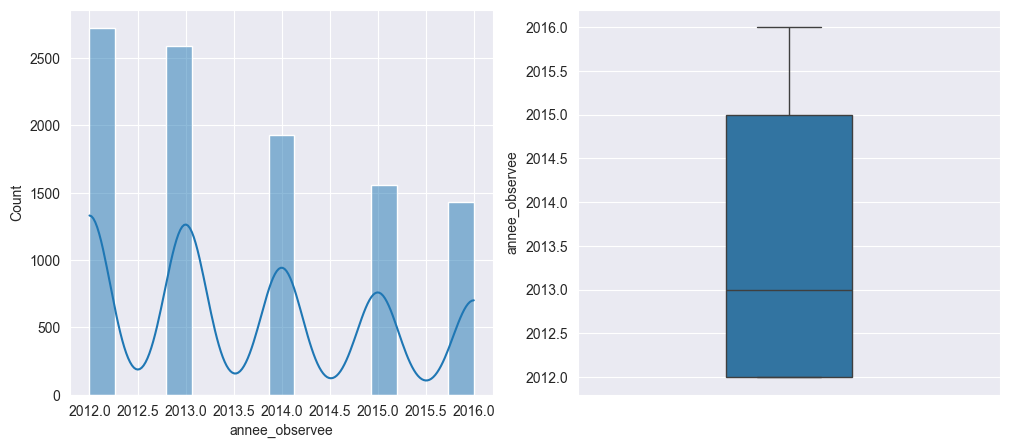

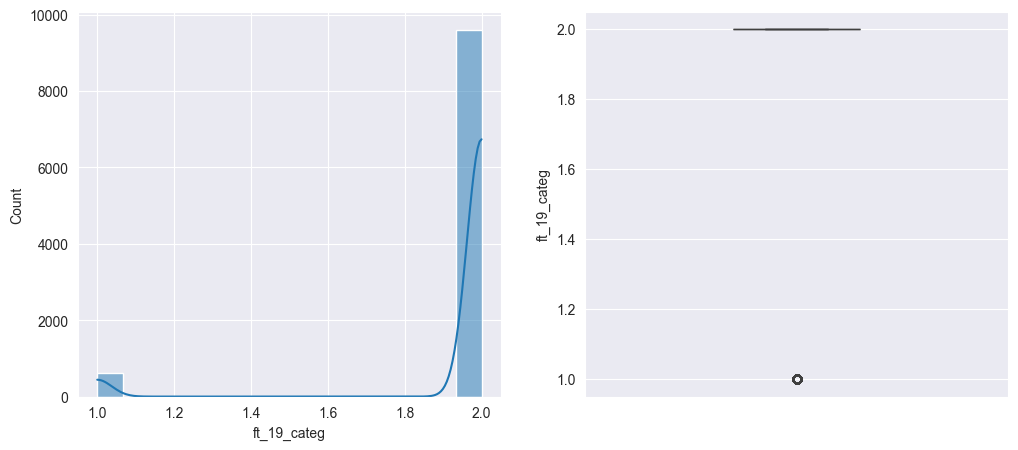

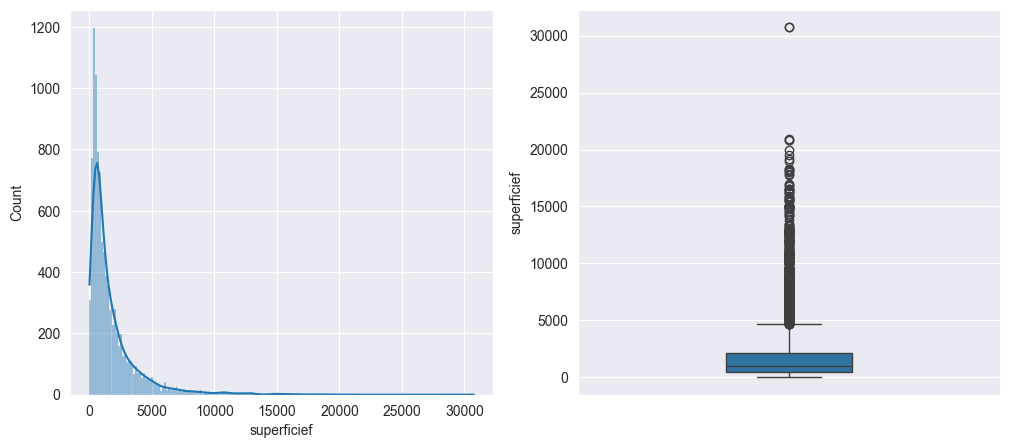

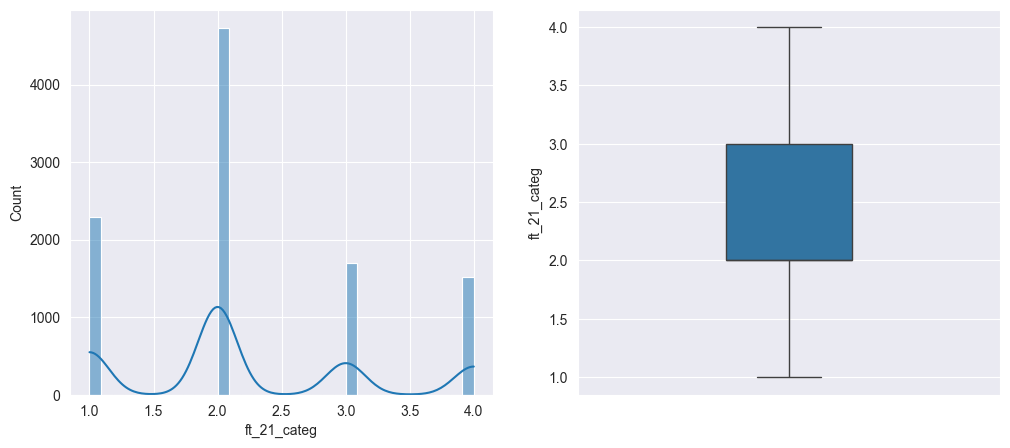

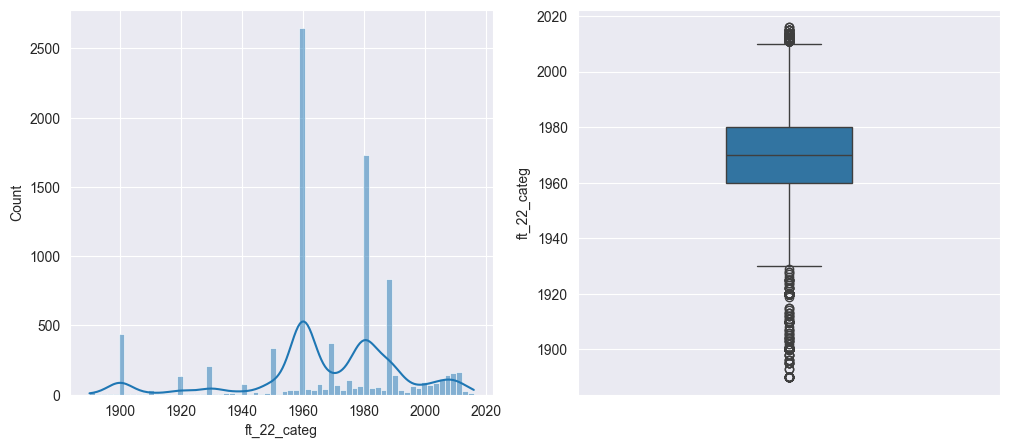

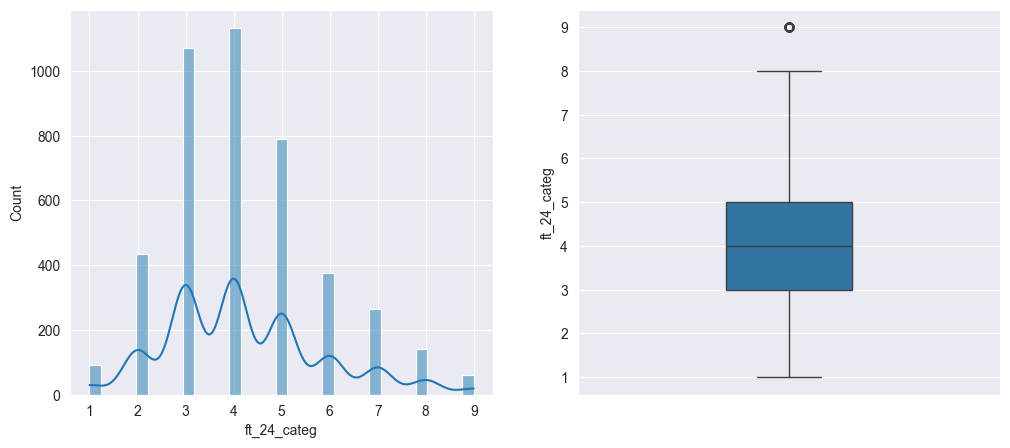

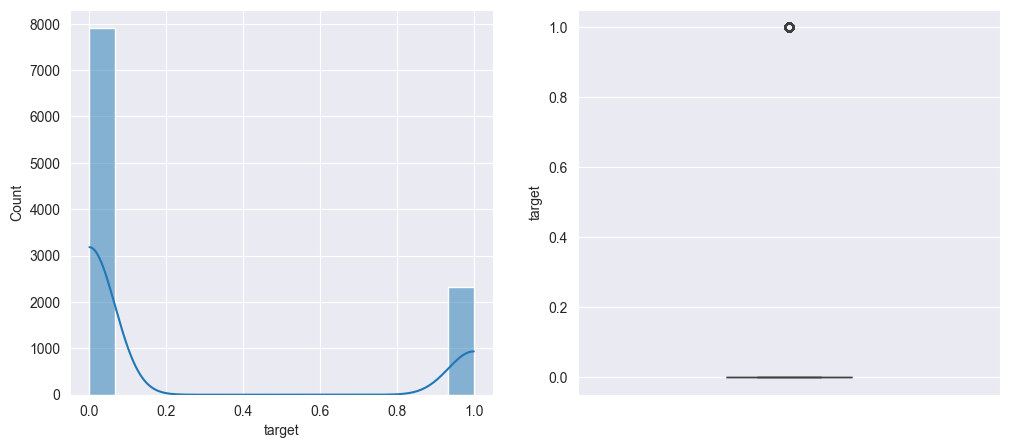

In [511]:
import seaborn as sns

for col in dfz.select_dtypes(['float64','int64']):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(dfz[col], kde=True, edgecolor=None)

    plt.subplot(1,2,2)
    sns.boxplot(dfz[col], width= 0.3)

Analyse Qualitative


In [512]:
for col in dfz.select_dtypes('object'):
    print(f'{col :-<20} {dfz[col].unique()}')

Identifiant--------- [18702 3877 4942 ... 8499 5319 8817]
EXPO---------------- ['1' '0,246575342' '0,99726776' '0,081967213' '0,580821918' '0,378082192'
 '0,41369863' '0,334246575' '0,161643836' '0,665753425' '0' '0,579234973'
 '0,163934426' '0,581967213' '0,832876712' '0,915068493' '0,24863388'
 '0,836065574' '0,452054795' '0,983561644' '0,271232877' '0,997260274'
 '0,545205479' '0,74863388' '0,330601093' '0,493150685' '0,75136612'
 '0,803278689' '0,912568306' '0,747945205' '0,164383562' '0,950684932'
 '0,964480874' '0,471232877' '0,284931507' '0,457534247' '0,846575342'
 '0,482191781' '0,375342466' '0,177595628' '0,082191781' '0,843835616'
 '0,43442623' '0,237704918' '0,578082192' '0,084931507' '0,051912568'
 '0,194520548' '0,123287671' '0,794520548' '0,25136612' '0,606557377'
 '0,97260274' '0,235616438' '0,494535519' '0,120547945' '0,584699454'
 '0,682191781' '0,087671233' '0,50273224' '0,909836066' '0,166666667'
 '0,882191781' '0,104109589' '0,504109589' '0,783561644' '0,336986301'

- Nous avons remarqué que les colonnes Identifiants et Insee comprenais beaucoup de valeurs unique et ne pouvais pas être analyser en donnée qualitatives, nous allons donc les retirer.
- Nous allons aussi arrondir les valeurs de la colonne EXPO au supérieur afin d'avoir des graphiques lisibles.
- Pour les colonnes ft_5_categ, ft_6_categ, ft_11_categ, ft_17_categ nous allons supprimer les données ayant pour valeurs 'O' car il y en a trop peu.
- Pour les colonnes ft_8_categ, ft_10_categ nous allons supprimer les données ayant pour valeurs 'N' car il y en a trop peu.
- Pour la colonne ft_9_categ nous allons supprimer les données ayant pour valeurs '2' et '3' car il y en a trop peu.

In [513]:
dfz.drop(dfz.columns[0], axis=1, inplace=True)
dfz.drop(dfz.columns[23], axis=1, inplace=True)
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   annee_observee  10229 non-null  int64  
 1   EXPO            10229 non-null  object 
 2   ft_4_categ      10229 non-null  bool   
 3   ft_5_categ      10229 non-null  object 
 4   ft_6_categ      10229 non-null  object 
 5   ft_7_categ      10229 non-null  object 
 6   ft_8_categ      10229 non-null  object 
 7   ft_9_categ      10229 non-null  object 
 8   ft_10_categ     10229 non-null  object 
 9   ft_11_categ     10229 non-null  object 
 10  ft_12_categ     10229 non-null  object 
 11  ft_13_categ     10229 non-null  object 
 12  ft_14_categ     10229 non-null  object 
 13  ft_15_categ     10229 non-null  object 
 14  ft_16_categ     10229 non-null  object 
 15  ft_17_categ     10229 non-null  object 
 16  ft_18_categ     10229 non-null  object 
 17  ft_19_categ     10229 non-null 

In [514]:
dfz['EXPO'] = dfz['EXPO'].str.replace(',', '.')
dfz['EXPO'] = dfz['EXPO'].astype(np.float64)
dfz['EXPO'] = dfz['EXPO'].round(1)
dfz['EXPO'] = dfz['EXPO'].astype(object)

In [515]:
dfz['ft_5_categ'] = dfz['ft_5_categ'].str.strip().replace(to_replace='O', value=np.nan)
dfz['ft_6_categ'] = dfz['ft_6_categ'].str.strip().replace(to_replace='O', value=np.nan)
dfz['ft_11_categ'] = dfz['ft_11_categ'].str.strip().replace(to_replace='O', value=np.nan)
dfz['ft_17_categ'] = dfz['ft_17_categ'].str.strip().replace(to_replace='O', value=np.nan)
dfz['ft_8_categ'] = dfz['ft_8_categ'].str.strip().replace(to_replace='N', value=np.nan)
dfz['ft_10_categ'] = dfz['ft_10_categ'].str.strip().replace(to_replace='N', value=np.nan)
dfz['ft_9_categ'] = dfz['ft_9_categ'].str.strip().replace(to_replace='2', value=np.nan)
dfz['ft_9_categ'] = dfz['ft_9_categ'].str.strip().replace(to_replace='3', value=np.nan)

# Graphique Qualitatif

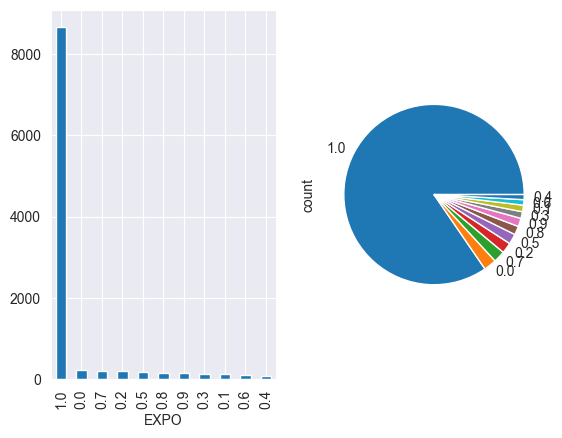

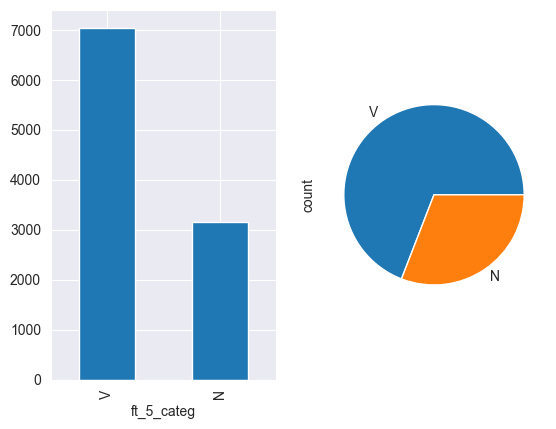

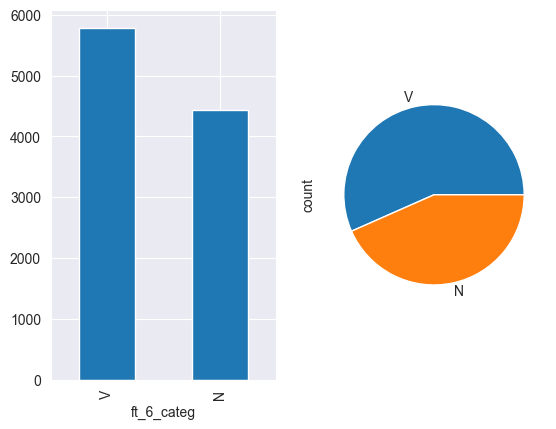

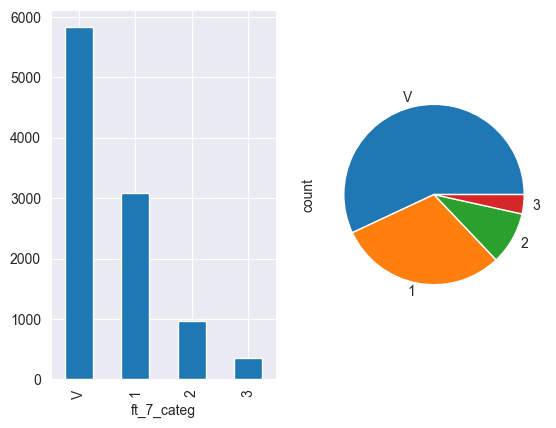

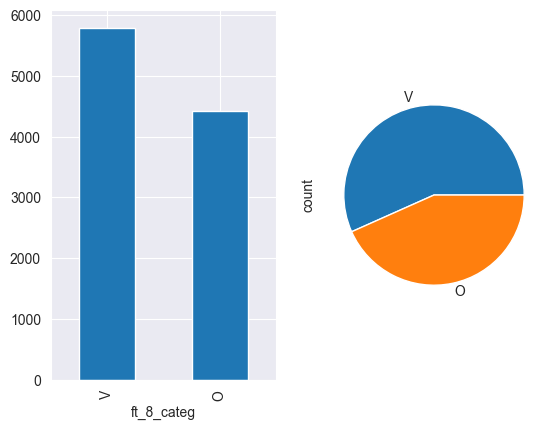

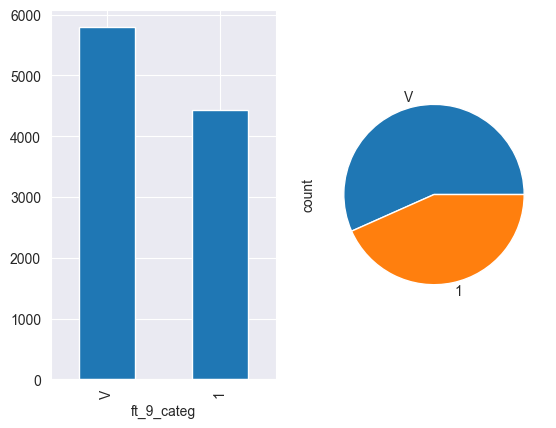

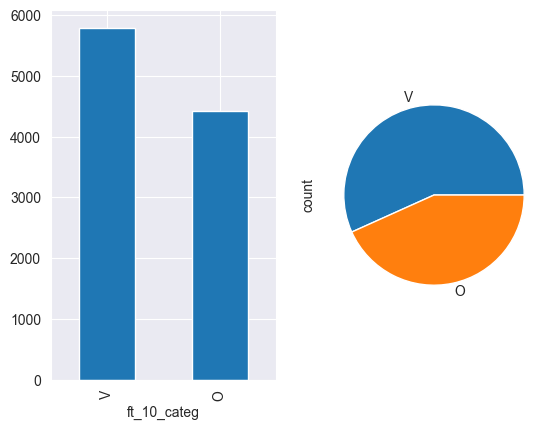

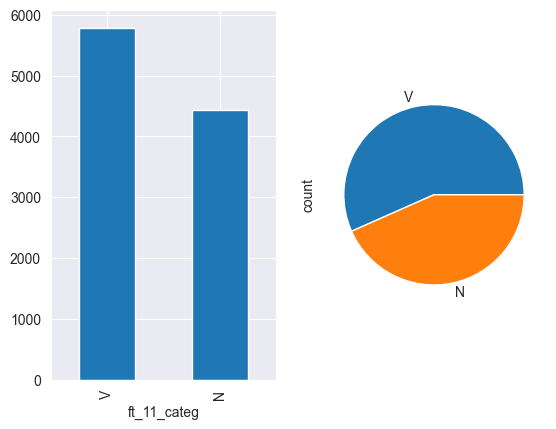

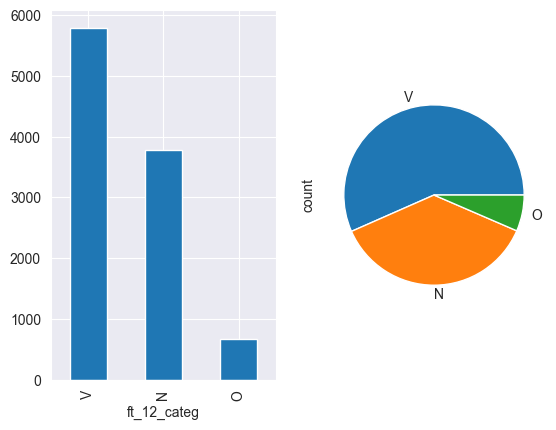

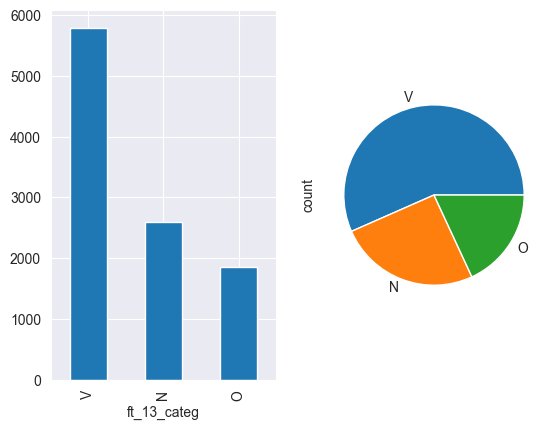

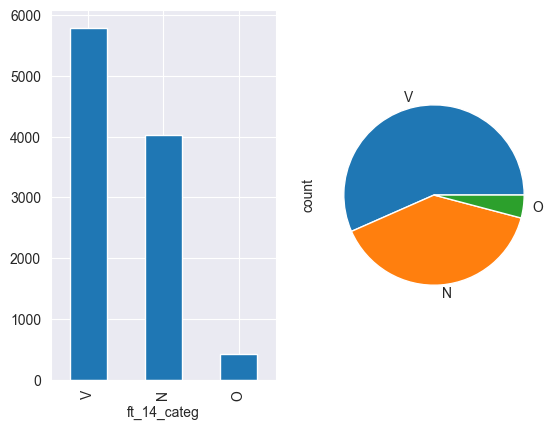

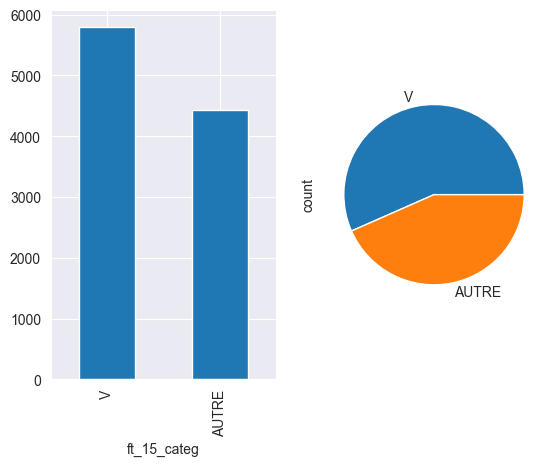

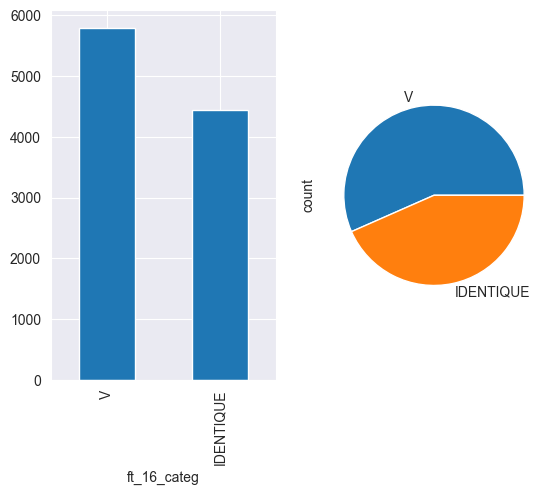

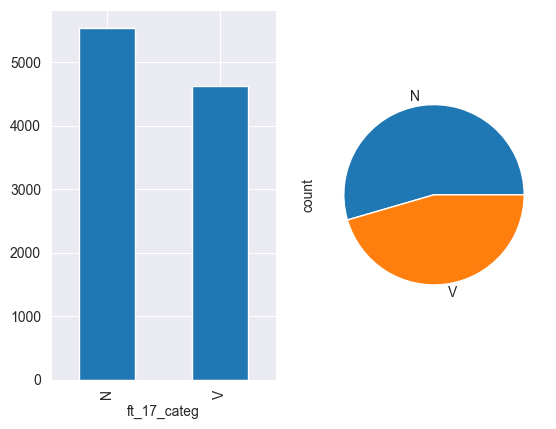

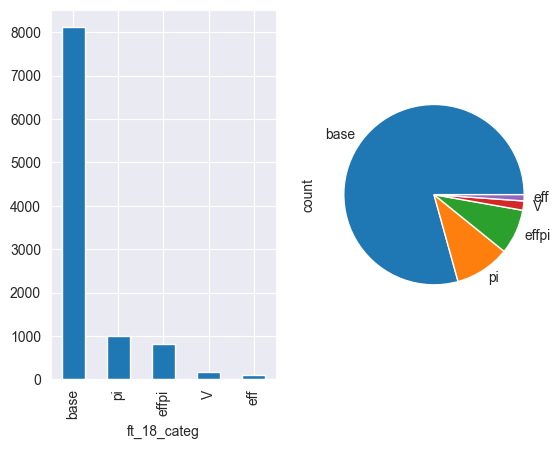

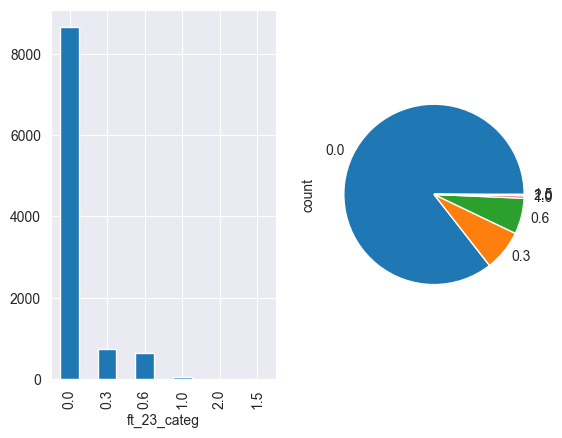

In [516]:
for col in dfz.select_dtypes('object') :
    plt.figure()
    
    plt.subplot(1,2,1)
    dfz[col].value_counts().plot(kind='bar')
    
    plt.subplot(1,2,2)
    dfz[col].value_counts().plot.pie()

# Analyse bivariée

In [517]:
positive_dfz = dfz[dfz['target'] == 1]
negative_dfz = dfz[dfz['target'] == 0]

In [518]:
positive_dfz['target'].value_counts()

target
1    2322
Name: count, dtype: int64

In [519]:
negative_dfz['target'].value_counts()

target
0    7907
Name: count, dtype: int64

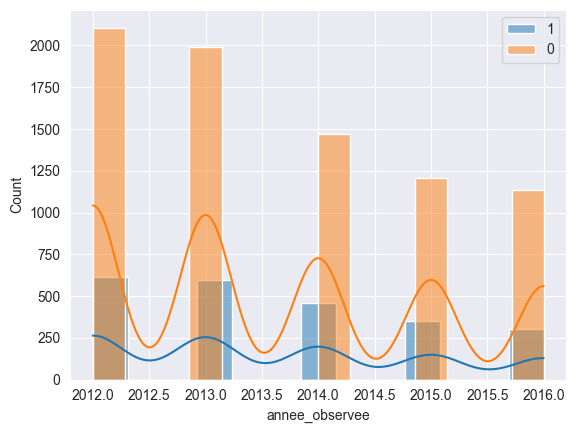

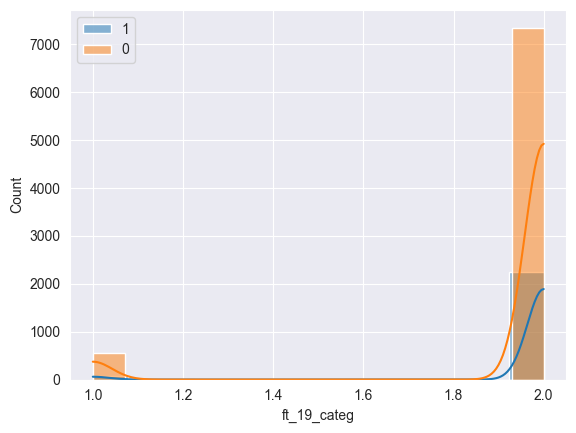

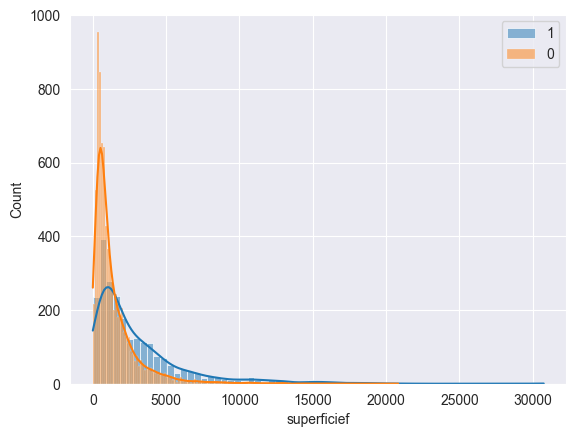

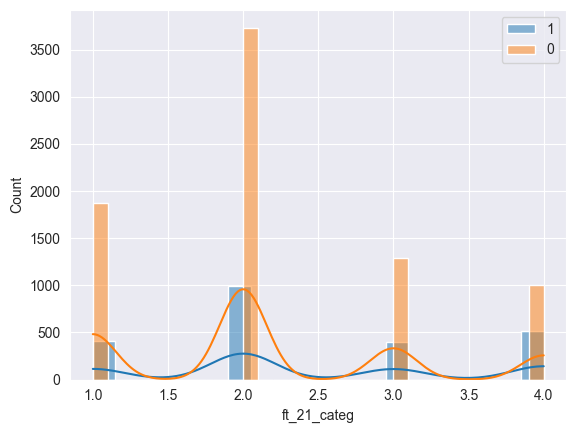

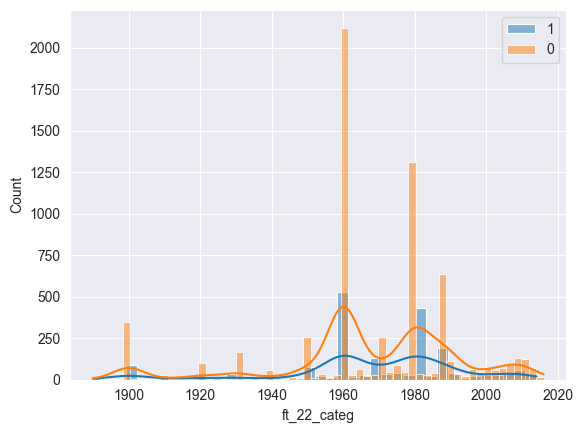

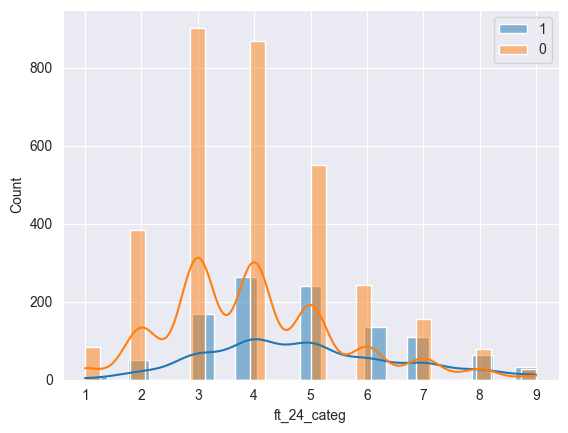

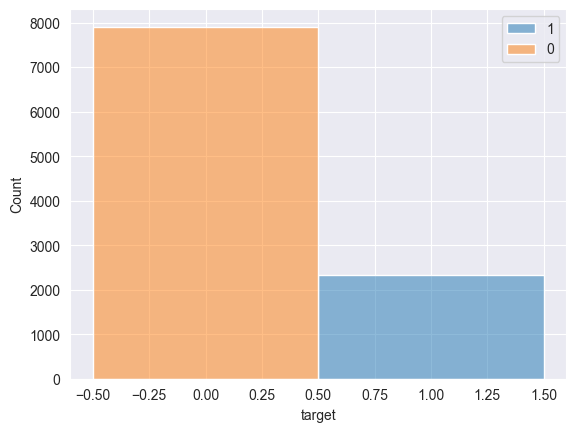

In [520]:
for col in positive_dfz.select_dtypes(['float64','int64']):

    sns.histplot(positive_dfz[col], label = '1', kde=True, edgecolor=None)
    sns.histplot(negative_dfz[col], label = '0', kde=True, edgecolor=None)
    
    plt.legend()
    plt.show()

# Analyse bivarié Qualitative

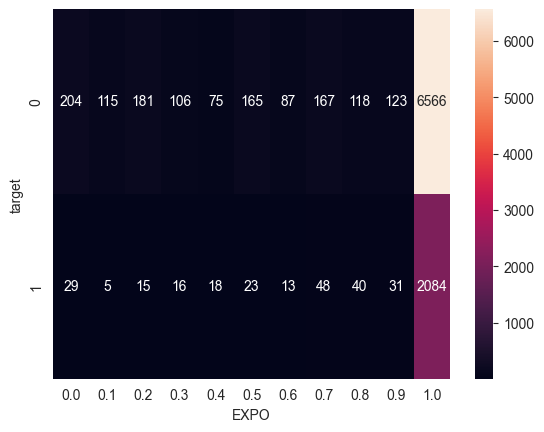

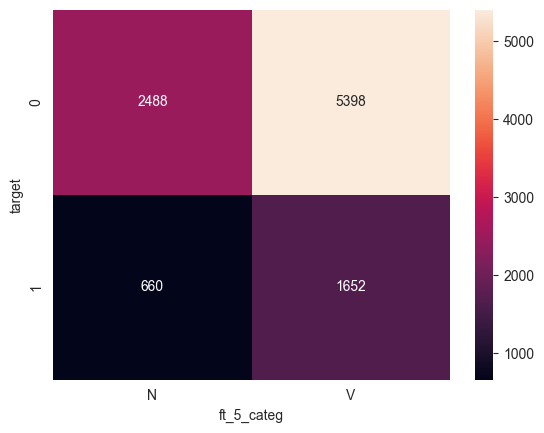

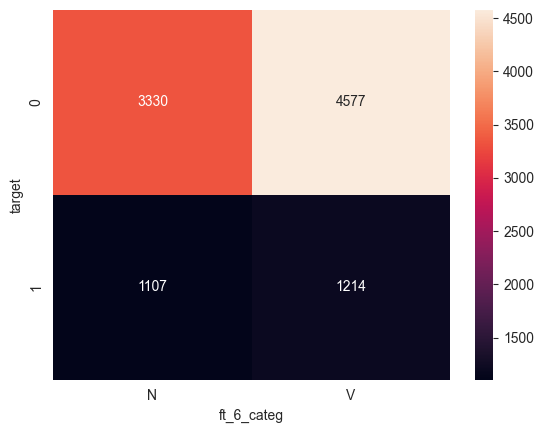

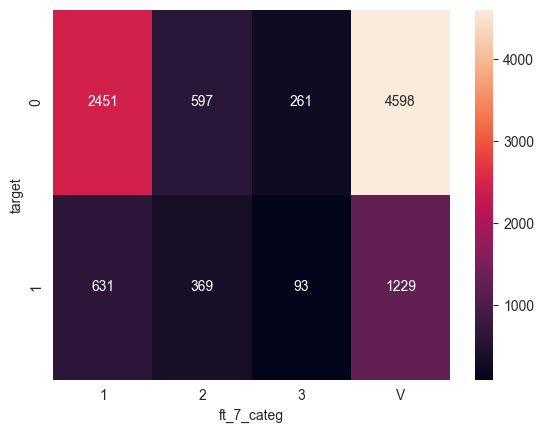

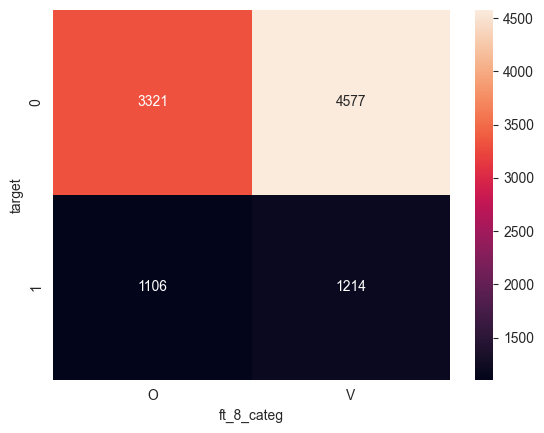

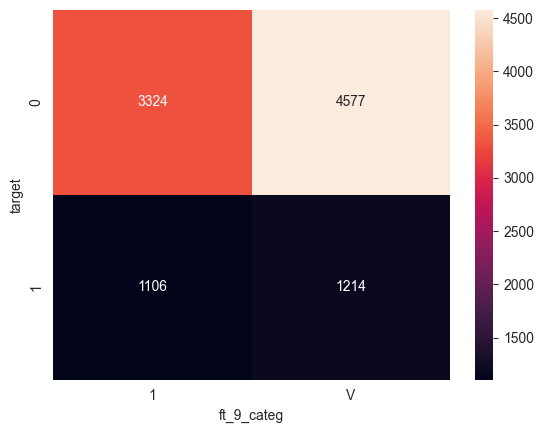

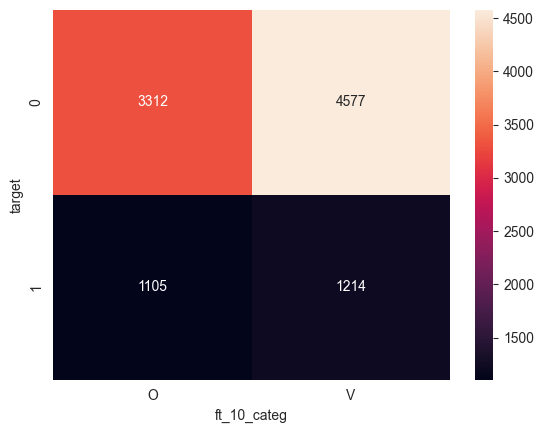

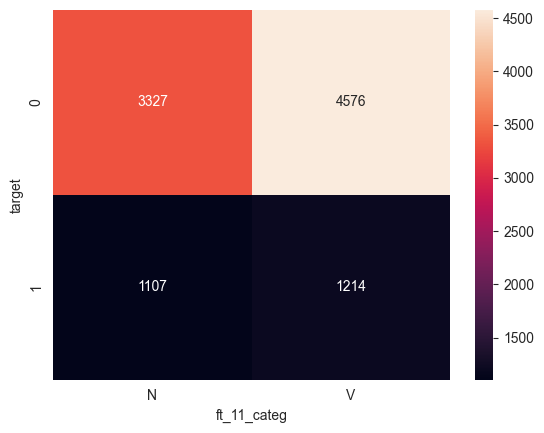

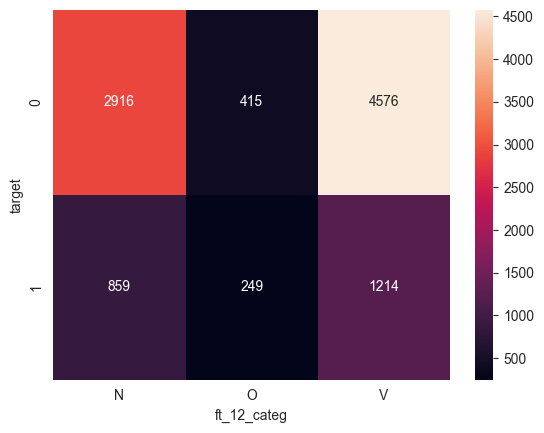

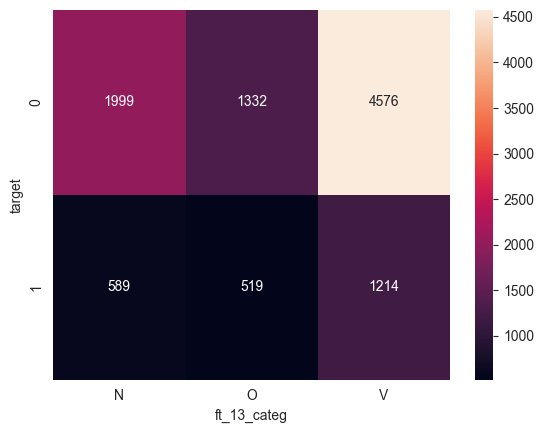

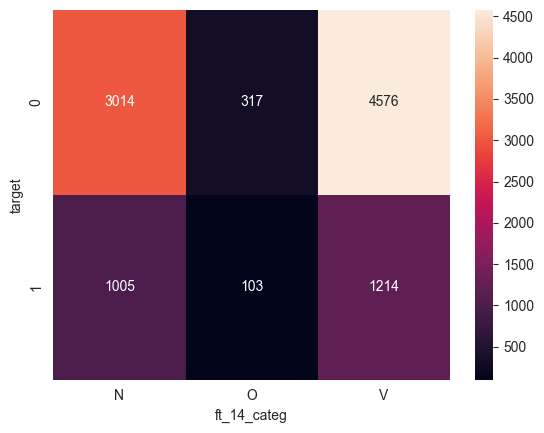

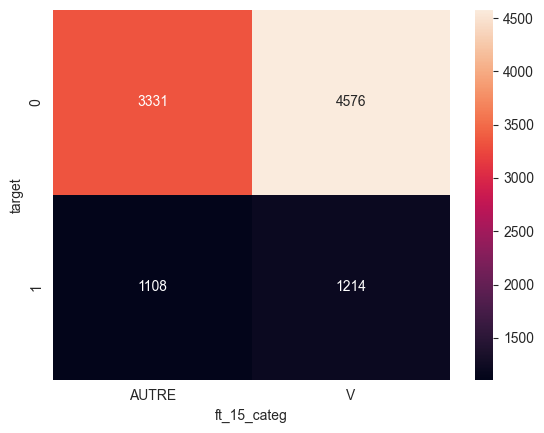

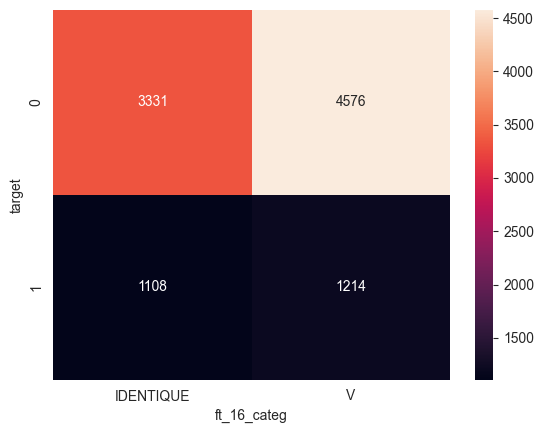

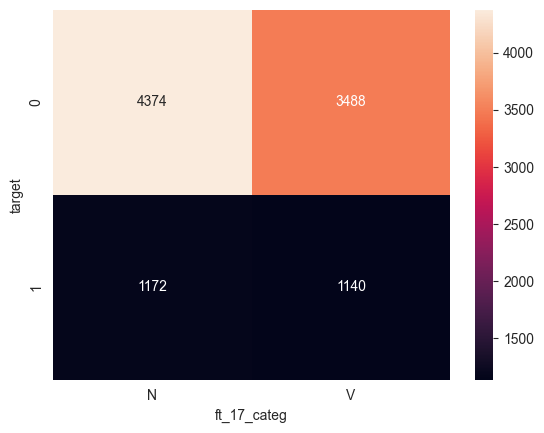

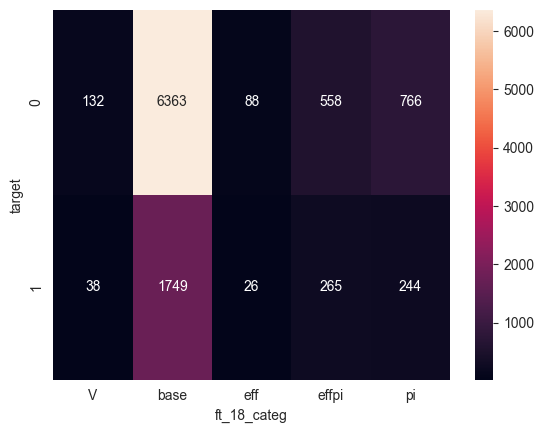

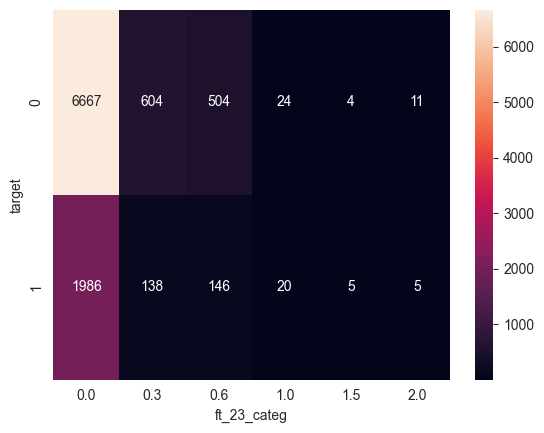

In [521]:
for col in dfz.drop('target', axis=1).select_dtypes('object'):
    
    plt.figure()
    sns.heatmap(pd.crosstab(dfz['target'], dfz[col]), annot=True, fmt='d')

# Observation à faire

# Preprocessing

In [522]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(dfz, test_size=0.2, random_state=0)
trainset['target'].value_counts()

target
0    6282
1    1901
Name: count, dtype: int64

In [523]:
testset['target'].value_counts()

target
0    1625
1     421
Name: count, dtype: int64

# Encodage

In [524]:
dfz_encoded = pd.get_dummies(dfz, columns=list(dfz.drop('target',axis=1).select_dtypes('object').columns), dtype=int)

In [525]:
dfz_encoded.head()

,annee_observee,ft_4_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_24_categ,target,EXPO_0.0,EXPO_0.1,...,ft_18_categ_base,ft_18_categ_eff,ft_18_categ_effpi,ft_18_categ_pi,ft_23_categ_0.0,ft_23_categ_0.3,ft_23_categ_0.6,ft_23_categ_1.0,ft_23_categ_1.5,ft_23_categ_2.0
0,2014,False,2,1351.0,4,2012.0,2.0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,2014,False,2,1972.0,2,1980.0,NaN,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,2013,True,2,1630.0,4,NaN,NaN,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,2013,False,2,532.0,3,NaN,NaN,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,2015,False,2,1050.0,2,1972.0,4.0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [526]:
def preprocessing(dfz):
    
    #encodage
    dfz = pd.get_dummies(dfz, columns=list(dfz.drop('target',axis=1).select_dtypes('object').columns), dtype=int)
    dfz['target'] = dfz['target'].astype('int')
    
    #gestion des valeurs manquantes
    dfz = dfz.dropna()
    
    #division variables explicatives et variable cible    
    X = dfz.drop('target', axis=1)
    y = dfz['target']
    
    return X, y

In [527]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

In [528]:
X_train.head()

,annee_observee,ft_4_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_24_categ,EXPO_0.0,EXPO_0.1,EXPO_0.2,...,ft_18_categ_base,ft_18_categ_eff,ft_18_categ_effpi,ft_18_categ_pi,ft_23_categ_0.0,ft_23_categ_0.3,ft_23_categ_0.6,ft_23_categ_1.0,ft_23_categ_1.5,ft_23_categ_2.0
8290,2015,False,2,2300.0,3,2006.0,6.0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4318,2013,False,2,350.0,2,1970.0,3.0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
7437,2015,False,2,850.0,4,1920.0,4.0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
8688,2014,False,2,5127.0,1,1968.0,7.0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
9513,2013,False,2,858.0,2,1995.0,2.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Construction du premier modèle


In [529]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [530]:
len(y_pred)

852

# Evaluation du premier modèle

In [531]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[507 160]
 [119  66]]


## Classification report

In [532]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       667
           1       0.29      0.36      0.32       185

    accuracy                           0.67       852
   macro avg       0.55      0.56      0.55       852
weighted avg       0.70      0.67      0.68       852



# Learning curve

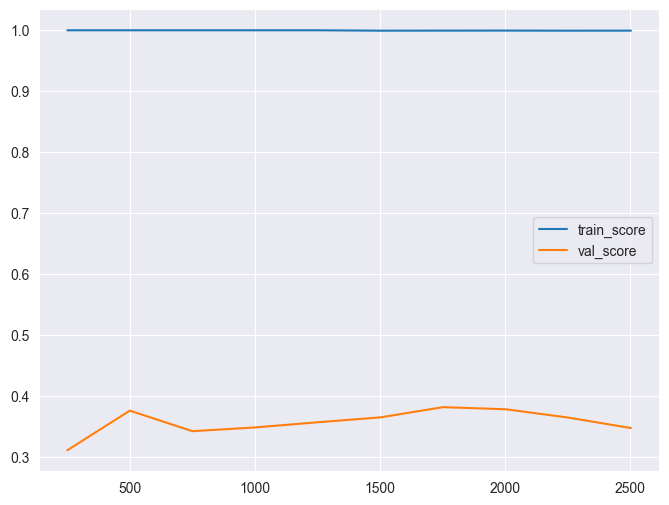

In [533]:
from sklearn.model_selection import learning_curve

N, train_score, val_score =learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1,1,10))

plt.figure(figsize=(8,6))

plt.plot(N,train_score.mean(axis=1), label = 'train_score')
plt.plot(N,val_score.mean(axis=1), label = 'val_score')
plt.legend()

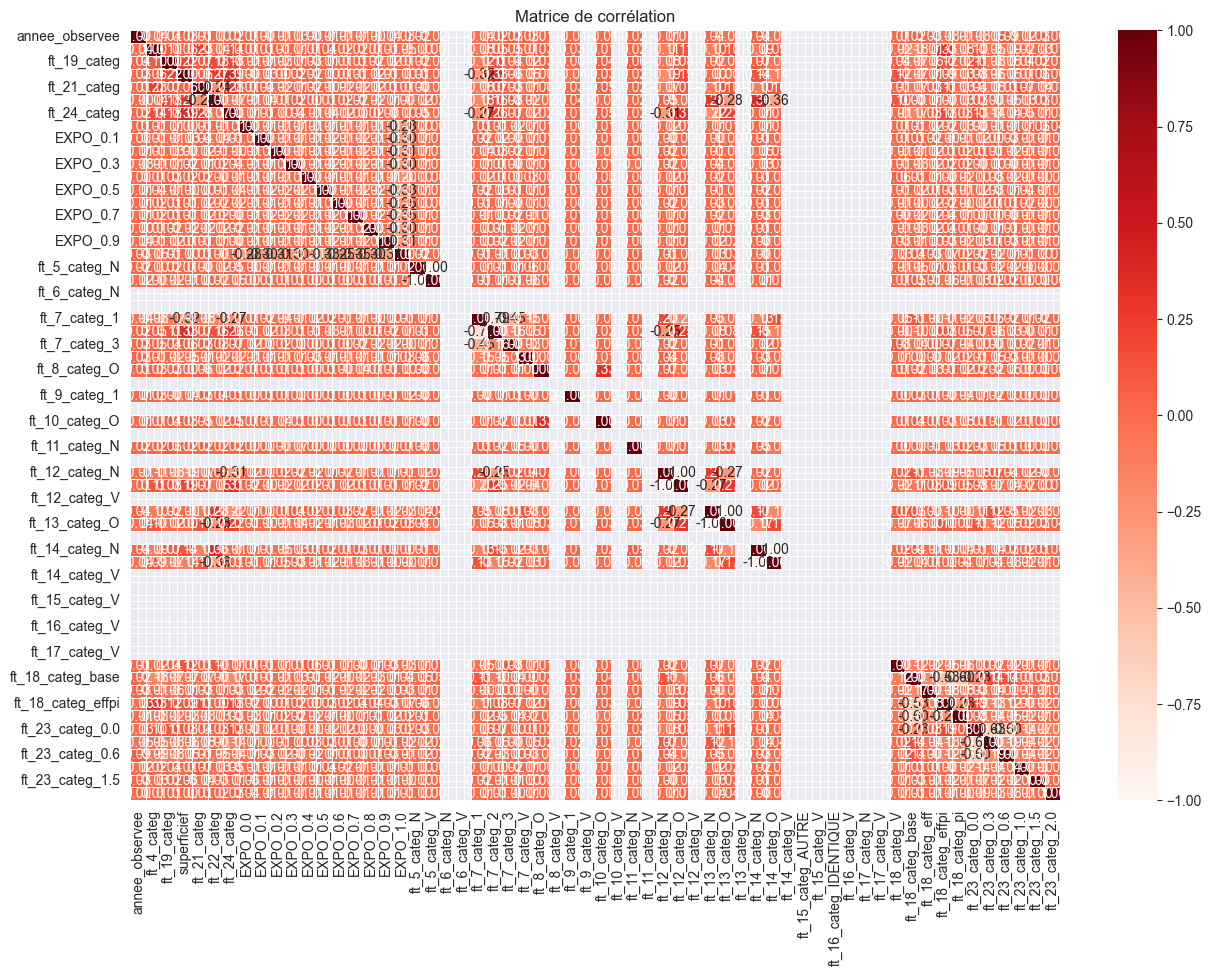

In [534]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_mat = X_train.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_mat, annot=True, linewidths=0.5, fmt='.2f', cmap='Reds')
ax.set_title('Matrice de corrélation')
plt.show()

In [535]:
X_train.var(axis=0)

annee_observee           1.961200e+00
ft_4_categ               2.150064e-01
ft_19_categ              1.162340e-01
superficief              5.970224e+06
ft_21_categ              9.092250e-01
ft_22_categ              1.130599e+03
ft_24_categ              2.767032e+00
EXPO_0.0                 1.125784e-02
EXPO_0.1                 1.359487e-02
EXPO_0.2                 1.417733e-02
EXPO_0.3                 1.330337e-02
EXPO_0.4                 6.253487e-03
EXPO_0.5                 1.621030e-02
EXPO_0.6                 9.497522e-03
EXPO_0.7                 1.765703e-02
EXPO_0.8                 1.330337e-02
EXPO_0.9                 1.446830e-02
EXPO_1.0                 1.142537e-01
ft_5_categ_N             2.093294e-03
ft_5_categ_V             2.093294e-03
ft_6_categ_N             0.000000e+00
ft_6_categ_V             0.000000e+00
ft_7_categ_1             2.136468e-01
ft_7_categ_2             1.702422e-01
ft_7_categ_3             7.486839e-02
ft_7_categ_V             1.008501e-02
ft_8_categ_O

# Fonction d'apprentissage et d'évaluation

[[623  44]
 [130  55]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       667
           1       0.56      0.30      0.39       185

    accuracy                           0.80       852
   macro avg       0.69      0.62      0.63       852
weighted avg       0.77      0.80      0.77       852



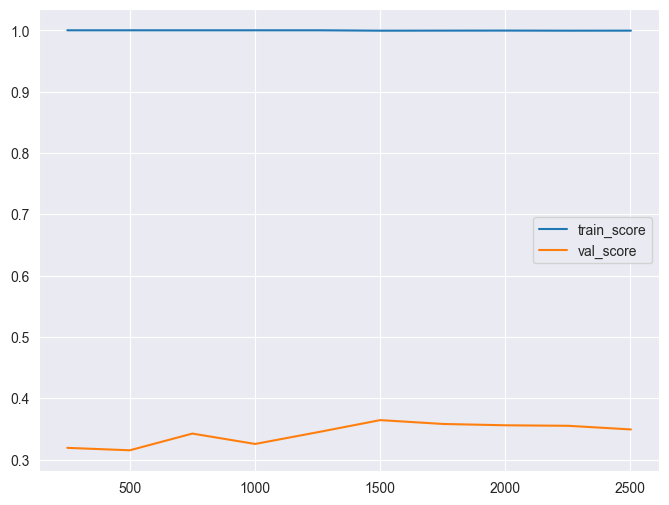

In [536]:
from sklearn.preprocessing import StandardScaler

def preprocessing(dfZ):

    #encodage
    dfZ = pd.get_dummies(dfZ, columns=list(dfZ.drop('target',axis=1).select_dtypes('object').columns), dtype=int)
    dfZ['target'] = dfZ['target'].astype('int')

    #feature selection
    dfZ = dfZ.drop(['ft_5_categ_N', 'ft_7_categ_1', 'ft_12_categ_N', 'ft_13_categ_N', 'ft_14_categ_N','ft_6_categ_N', 'ft_6_categ_V', 'ft_8_categ_V', 'ft_9_categ_V', 'ft_10_categ_V', 'ft_11_categ_V', 'ft_12_categ_V', 'ft_13_categ_V', 'ft_14_categ_N', 'ft_14_categ_O', 'ft_14_categ_V', 'ft_15_categ_AUTRE', 'ft_15_categ_V', 'ft_16_categ_IDENTIQUE', 'ft_16_categ_V', 'ft_17_categ_N', 'ft_17_categ_V', 'ft_18_categ_V', 'ft_18_categ_eff' ], axis=1)


    #gestion des valeurs manquantes
    dfZ = dfZ.dropna()
    dfZ = dfZ.fillna(dfZ.mean())

    #division variables explicatives et variable cible
    X = dfZ.drop('target', axis=1)
    y = dfZ['target']

    #Standardisation
    X = StandardScaler().fit_transform(X)

    return X, y
def evaluation(model, X_train, y_train, X_test, y_test):
    #entrainement
    model.fit(X_train, y_train)

    #prediction
    y_prod = model.predict(X_test)

    #evaluation
    print(confusion_matrix(y_test, y_prod))

    print(classification_report(y_test, y_prod))

    #learning
    N, train_score, val_score =learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(8,6))

    plt.plot(N,train_score.mean(axis=1), label = 'train_score')
    plt.plot(N,val_score.mean(axis=1), label = 'val_score')
    plt.legend()
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

evaluation(model, X_train, y_train, X_test, y_test)

 J'ai une meilleure précision maintenant que j'ai enlever les -1.0, on passe 0.67 à 0.80

In [537]:
importancesdf = pd.DataFrame(model.feature_importances, index=X_train.columns, columns=['Importance'])
importances_df.sort_values(by='Importance', ascending=False).plot.bar(color='purple')
plt.xlabel('Fonctionnalités')
plt.ylabel('Importance')
plt.title('Importance des fonctionnalités')
plt.show()

AttributeError: 'RandomForestClassifier' object has no attribute 'feature_importances'